In [0]:
import numpy as np
import sklearn.datasets
import sklearn.linear_model
import sklearn.metrics

In [0]:
np.random.seed(42)  # do not change for reproducibility

In this test we use the [Covertype Data Set](http://archive.ics.uci.edu/ml/datasets/Covertype), a dataset describing cartographic 
features of areas of land in the USA and also its forest type according to the US Forest Service. 
There are seven classes (1-7), 581012 samples and 54 features.
For this test, we're only interested in cover type 3.




In [4]:
dataset = sklearn.datasets.fetch_covtype()

In [0]:
# only use a random subset for speed - pretend the rest of the data doesn't exist
random_sample = np.random.choice(len(dataset.data), len(dataset.data) // 10)

COVER_TYPE = 3
features = dataset.data[random_sample, :]
target = dataset.target[random_sample] == COVER_TYPE

A junior colleague tells you that they're getting 96% accuracy using logistic regression. You review their work and see the following:

In [0]:
classifier = sklearn.linear_model.LogisticRegression(solver='liblinear') # do not change this


In [0]:
classifier.fit(features,  target)
training_predictions = classifier.predict(features)
accuracy = sklearn.metrics.accuracy_score(training_predictions, target)

In [34]:
print(f'Accuracy: {accuracy:.3f}')

Accuracy: 0.963


**Question 1**

Evaluate the accuracy more thoroughly. Do not modify the parameters of the model (the cell marked with the comment). Use the classifier object.

In [0]:
### Write your code and explanation here.

Evaluating the accuracy of the model would require to investigate the metric by its definition which states it is the **ratio of number of correct predictions to the total number of input samples. That is by formula (TP+TN)/(TP+TN+FP+FN)**


Where :
* TP - True Positives - Observation is positive, and is predicted to be positive.
* TN - True Negatives - Observation is negative, and is predicted to be negative.
* FP - False Positive - Observation is negative, but is predicted positive.
* FN - False Negative - Observation is positive, but is predicted negative.

**Importing the libraries**

In [0]:
pip install matplotlib==3.1.0

In [0]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.utils.multiclass import unique_labels
from sklearn.model_selection import learning_curve
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import warnings
import pandas as pd
from pylab import rcParams
warnings.filterwarnings("ignore")

**Convertion from bool typle to int type labels**

In [0]:
#target = target = target.astype(int)
#training_predictions = training_predictions.astype(int)

**Class Label:**
* **Cover Type = 3 (Ponderosa pine) then Class Label = 1**
* **Other Cover Type then Class Label = 0**

**Computing the confusion matrix for predictions and target**

In [0]:
cf =confusion_matrix(target,training_predictions)           # compute confusion matrix to evaluate the accuracy of a classification
conf_elements = cf.ravel()                                                # Flattening into 1D array

**Function for printing the elements of the confusion matrix**
> The confusion matrix can be determined for two class that is class - 1 which has cover type 3 and class - 0 which does not have cover type 3. So the function will take an argument "class_name" that is either class 0 or class 1 and then find the elements of the matrix accordingly.

In [0]:
def conf_matrix(class_name):
    if class_name ==1:                                                                              # Printing the elements of confusion matrix for class - 1 i.e Type 3 cover
        print("Elements of confusion matrix for Class {}".format(class_name))
        #acc = (conf_elements[3] + conf_elements[0])/(conf_elements[3] + conf_elements[0] + conf_elements[1] + conf_elements[2])
        print("True Positives = {}".format(conf_elements[3]))
        print("False Positives = {}".format(conf_elements[1]))
        print("True Negatives = {}".format(conf_elements[0]))
        print("False Negatives = {}".format(conf_elements[2]))
        #print("Accuracy = {:0.4f} ".format(acc))
    else:                                                                                                     # Printing the elements of confusion matrix for class - 0 i.e Not Type 3 cover
        print("Elements of confusion matrix for Class {}".format(class_name))
        #acc = (conf_elements[0] + conf_elements[3])/(conf_elements[3] + conf_elements[0] + conf_elements[1] + conf_elements[2])
        print("True Positives = {}".format(conf_elements[0]))
        print("False Positives = {}".format(conf_elements[2]))
        print("True Negatives = {}".format(conf_elements[3]))
        print("False Negatives = {}".format(conf_elements[1]))
        #print("Accuracy = {:0.4f} ".format(acc))


In [11]:
print(conf_matrix(1))                                                           # Determining the confusion matrix for class - 1
print(conf_matrix(0))                                                           # Determining the confusion matrix for class - 0
print("Verification of the accuracy by computing it through the formula is  {:0.2f}%".format( ((conf_elements[0] + conf_elements[3])/
                                                                                                                                        (conf_elements[3] + conf_elements[0] + conf_elements[1] + conf_elements[2]))*100))

Elements of confusion matrix for Class 1
True Positives = 2347
False Positives = 934
True Negatives = 53626
False Negatives = 1194
None
Elements of confusion matrix for Class 0
True Positives = 53626
False Positives = 1194
True Negatives = 2347
False Negatives = 934
None
Verification of the accuracy by computing it through the formula is  96.34%


**Plotting of confusion matrix for Class - 1 (Cover type 3)**

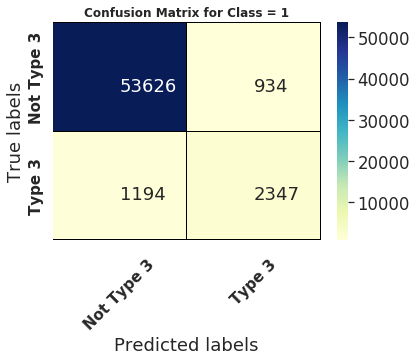

In [14]:
# Defining the parameters of the heatmap  generation for confusion matrix using seaborn
ax= plt.subplot()
akws = {"ha": 'left',"va": 'top'}
sns.heatmap(cf, annot=True, ax = ax, cmap=plt.cm.YlGnBu, cbar=True, linewidths=0.05, linecolor="black", fmt="d", annot_kws=akws)
sns.set(font_scale=1.0)

# A bug in matplotlib that will cut off the graph  on the edges so to handle that this code is helpful
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

# Setting the label names, graph title, and other properties of annotation text using matplotlib and seaborn libraries
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix for Class = 1', fontweight="bold"); 
ax.xaxis.set_ticklabels(['Not Type 3', 'Type 3']); ax.yaxis.set_ticklabels(['Not Type 3', 'Type 3']);
plt.setp(ax.get_xticklabels(), fontsize=15, fontweight="bold", 
         horizontalalignment="center", verticalalignment = "top", rotation = 45);
plt.setp(ax.get_yticklabels(), fontsize=15, fontweight="bold", 
         horizontalalignment="center",verticalalignment = "center");
plt.tick_params(axis='both', which='major', pad=10); 

**Evaluating the accuracy for unseen data using train-test-split strategy.**

In the task assigned the model was fitted and predicted with same data and hence the accuracy cannot be justified. So to verify the classification power of the model it has to predict on an unseen dataset based on the function learnt from the training. Therefore I have splitted the whole data set into 65% as training data and 35% as test data.

**Scaling of all 54 features**
> As seen from the visualization of the features box plot we can understand how much are featured spread starting from 0 to 1000's hence we have to scale them between 0 to 1 so that they do not influence the model.

In [0]:
scaler = MinMaxScaler(feature_range = (0,1))
features_scaled = scaler.fit_transform(features)

**Train and Test split, model fitting, model prediction, cross validated accuracy on training set and model evaluation on testing set**

The function "cross_val_score" uses Stratified KFold cross validation and it is necessary for binary classification problem. The value of K is chosen to be 20 in order to eliminate bias costing more computing time and power.

The variance of cross validated accuracy is pretty low as it varies on the 4th decimal point only.

But the model is overfitting as the accuracy on the test data is quite close to the training accuracy. Hence to avoid this, feture engineering needs to be done.

In [16]:
#Train and test split
Train_features, Test_features, Train_labels, Test_labels = train_test_split(features_scaled, target, test_size = 0.35, random_state = 42)
#Fitting the model
clf  = classifier.fit(Train_features,  Train_labels)
#Training evaluation
accuracy_cv  = cross_val_score(clf, Train_features, Train_labels, cv = 20, scoring = 'accuracy')

print("The mean accuracy score of the classifier on our training set is {:0.2f}%".format(np.round(accuracy_cv.mean()*100, 2)))
print('The range of accuracy score for training set : {:.4f} (+/- {:.4f})'.format(accuracy_cv.mean(), accuracy_cv.std() * 2))
print("\n")
#Model prediction
predicted_labels = clf.predict(Test_features)
#Model Evaluation
accuracy_test = accuracy_score(Test_labels, predicted_labels)
print("The accuracy score on the testing set is",np.round(accuracy_test*100, 2))



The mean accuracy score of the classifier on our training set is 96.45%
The range of accuracy score for training set : 0.9645 (+/- 0.0066)


The accuracy score on the testing set is 96.32


**Question 2**

Is accuracy the most suitable metric for this problem?

In [0]:
### Write your code and explanation here.

**Answer - Accuracy is NOT the most suitable metric for classification problem.**


---

*   The reason for  the statement is that the metric accuracy does not consider the class for it's calculation. The accuracy remains the same for every class as noticed in the above code snippet. The accuracy for determining if **the cover is of type 3 is 93.6%** and it is the same if we try to determine **the cover is not of type 3.**

*   Suppose we use a classifier which has zero predictive power (i.e TP=0, FP=0) then accuracy of the classifier as per definition will tend to increase beyond 100% which is technically incorrect.

*   The covertype dataset considering only cover type 3 (Ponderosa pine) is quite unbalanced because it has 94% of instances in one class and only 6% in the other and by choosing accuracy as metric we are assigning equal weightage to FP and FN.
This might result in high accuracy for a model but might yield poor precision and recall values which is not satisfactory.









To evaluate the performance of a classifier there are other metrics in addition to accuracy:
* Precision - It indicates an example labeled as positive is indeed positive.  TP/(TP+FP)
* Recall - It indicates the class is correctly recognized . TP/(TP+FN)
* F- Measure - The F-Measure will always be nearer to the smaller value of Precision or Recall because it takes into account he harmonic mean and not the arithmetic mean.
* Area under the curve (AUC) - AUC score tell us about the distinguishing power of the classifier between positive and negative class.

**Macro and Micro averaging precision, recall and F1 score**

In [0]:
def metrics_score(avg_tech):
    print("The {} averaging values are as follows:".format(avg_tech))
    print("The precison score = {:0.4f}".format(precision_score(target, training_predictions, average=avg_tech)))
    print("The recall score  = {:0.4f}".format(recall_score(target, training_predictions, average=avg_tech)))
    print("The F1 score  = {:0.4f}".format(f1_score(target, training_predictions, average=avg_tech)))

In [38]:
print(metrics_score('macro'))
print(metrics_score('micro'))
print("Hence from the results we can see that the classifier having an accuracy of 94% falls to have a precision and recall score of 82-84%")

The macro averaging values are as follows:
The precison score = 0.8468
The recall score  = 0.8228
The F1 score  = 0.8343
None
The micro averaging values are as follows:
The precison score = 0.9634
The recall score  = 0.9634
The F1 score  = 0.9634
None
Hence from the results we can see that the classifier having an accuracy of 94% falls to have a precision and recall score of 82-84%


**Area under the ROC**

Best threshold value 0.094


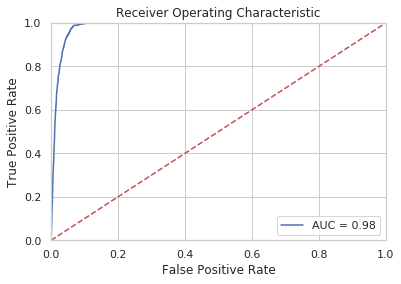

In [43]:
# Predicting the probability of class assignment for each chosen sample from the Train_features 
probs = classifier.predict_proba(Train_features)
# Choosing the class for which the AUC has to be determined.
preds = probs[:,1]
# Calculating false positive rate, true postive rate and the possible thresholds that can clearly separate TP and TN.
fpr, tpr, threshold = metrics.roc_curve(Train_labels, preds)
roc_auc = metrics.auc(fpr, tpr)

# Finding the best threshold value for distingushing the positive and negative class
sum_sensitivity_specificity = tpr + (1-fpr)
best_threshold_id = np.argmax(sum_sensitivity_specificity)
best_threshold = threshold[best_threshold_id]
print("Best threshold value {:0.3f}".format(best_threshold))

# Plotting of the ROC and determining the AUC score
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


The dashed line in the diagonal we present the ROC curve of a random predictor  it has an AUROC of 0.5. The random predictor is commonly used as a baseline to see whether the model is useful. Hence for our model the AUROC is 0.98 which is really a good value to proceed for prediction.

**Question 3**

Should you get more training data?

In [0]:
### Write your code and explanation here.

**Function for plotting the learning curve**

In [0]:
def plot_learning_curve(model,title, X, y,n_jobs = 1, ylim = None, cv = None,train_sizes = np.linspace(0.1, 1, 10)):
    
    # Figrue parameters
    plt.figure(figsize=(10,8))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel('Training Examples')
    plt.ylabel('Score')
    
    train_sizes, train_score, test_score = learning_curve(model, X, y, cv = cv, n_jobs=n_jobs, train_sizes=train_sizes)
    
    # Calculate mean and std
    train_score_mean = np.mean(train_score, axis=1)
    train_score_std = np.std(train_score, axis=1)
    test_score_mean = np.mean(test_score, axis=1)
    test_score_std = np.std(test_score, axis=1)
    
    plt.grid()
    plt.fill_between(train_sizes, train_score_mean - train_score_std, train_score_mean + train_score_std,
                    alpha = 0.1, color = 'r')
    plt.fill_between(train_sizes, test_score_mean - test_score_std, test_score_mean + test_score_std,
                    alpha = 0.1, color = 'b')
    
    plt.plot(train_sizes, train_score_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_score_mean, 'o-', color="b", label="Cross-validation score")
    
    plt.legend(loc = "best")
    return plt

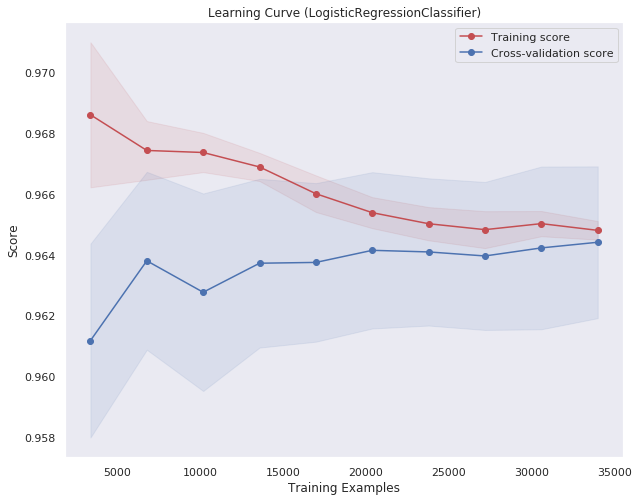

In [20]:
title = 'Learning Curve (LogisticRegressionClassifier)'
plot_learning_curve(classifier,title,Train_features, Train_labels, n_jobs=-1,ylim=None,cv=10)
plt.show()

**Observations**



1.   The end point of the two curves is converging at the end of the training samples.
2.   The Training score is dripping from 0.968 to 0.965 which is negligible and can be considered as a plateau surface.
3. The cross validated score is increasing from 0.961 to 0.964.
4. The variance of the training score is less compared to the variance of the cross validated score.
5. The gap between the training score line and cross validated score line is narrowed down as the training samples are increased.



**Inferences**

* From the Pt.1 we can infer that the score lines will reach asymptotic convergence in the next iteration and hence we can early stop our model with this amount of training examples.
* From Pt.2 and 3 we can say that the model is learning because the cross validated score is has improved from the start of training examples till the end.
* From Pt.4 this model suffers primarily from error due to variance (the CV scores for the test data are more variable than for training data) so it is possible that the model is overfitting.

**Solution**

Increasing the training samples will incorporate more variance hence it is better to early stop our training on 22000 samples and focus on engineering the features. We must find out independent featues that contribute to the prediction of class of cover type 3 and drop out less significant features due which is actually causing high varince in the testing data.

**Question 4**

How would you decide which features to include in the deployed model?

In [0]:
### Write your code and explanation here.

**Assigning the target variable of forest cover type and converting it into int type from bool**

In [0]:
target_covertype = dataset.target[random_sample] == 3
target_covertype = target_covertype.astype(int)

# Extracting the class -1 and dropping class - 0. This dataframe is not used anywhere though. Neglect.
target_covertype_true = []
for i in range(len(target_covertype)):
    if target_covertype[i]==1:
        target_covertype_true.append(target_covertype[i])

d_target_covertype_true = {'Target':target_covertype_true}
df_target_covertype_true = pd.DataFrame(d_target_covertype_true)

**Extracting the features**

The CoverType dataset has 54 features that are distributed non uniformly across all the 7 Forest cover types. But the model uses only cover type 3 as the target variable. Hence we have to extract and weigh the salient features which are most relavant to type 3 alone. 

In [0]:
specific_features = []
for i in range(len(target_covertype)):
    if target_covertype[i] == 1: 
       specific_features.append(features[i])

**Segregating the features into separate lists for further feature visualoization**

The list name indicates and describes the feature by itself.

Two tpyes of feature are encountered in the dataset:

*   Numerical feature - Elevation, Aspect, Horizontal_Distance_To_Hydrology, Vertical_Distance_To_Hydrology, Horizontal_Distance_To_Roadways, Hillshade_9am, Hillshade_Noon, Hillshade_3pm, Horizontal_Distance_To_Fire_Points.
*   Binary feature - Wilderness area 1, 2, 3, 4 and Soil types 1 to 40.

Both of these features cannot be correlated hence we have to perform feature engineering separately.



In [0]:
elevation_feature=[]
aspect_feature = []
slope_feature = []
Horizontal_Distance_To_Hydrology_feature = []
Vertical_Distance_To_Hydrology_feature = []
Horizontal_Distance_To_Roadways_feature = []
Hillshade_9am_feature = []                          
Hillshade_Noon_feature = []                        
Hillshade_3pm_feature = []                        
Horizontal_Distance_To_Fire_Points_feature = []
Wild_Area1 = []
Wild_Area2 = []
Wild_Area3 = []
Wild_Area4 = []
Soil_type = []

for i in range(len(specific_features)): 
    elevation_feature.append(specific_features[i][0]) 
    aspect_feature.append(specific_features[i][1])
    slope_feature.append(specific_features[i][2])
    Horizontal_Distance_To_Hydrology_feature.append(specific_features[i][3])
    Vertical_Distance_To_Hydrology_feature.append(specific_features[i][4])
    Horizontal_Distance_To_Roadways_feature.append(specific_features[i][5])
    Hillshade_9am_feature.append(specific_features[i][6])
    Hillshade_Noon_feature.append(specific_features[i][7])
    Hillshade_3pm_feature.append(specific_features[i][8])
    Horizontal_Distance_To_Fire_Points_feature.append(specific_features[i][9])
    Wild_Area1.append(specific_features[i][10])
    Wild_Area2.append(specific_features[i][11])
    Wild_Area3.append(specific_features[i][12])
    Wild_Area4.append(specific_features[i][13])
    Soil_type.append(specific_features[i][14:])


**Converting the feature lists into dataframe for collective visualization of BoxPlot**

In [0]:
 d_numeric = {'Elevation':elevation_feature,'Aspect':aspect_feature, 'Slope':slope_feature,'Hor Dist Hydro':Horizontal_Distance_To_Hydrology_feature,'Ver Dist Hydro':Vertical_Distance_To_Hydrology_feature,
      'Hor Dist Road':Horizontal_Distance_To_Roadways_feature,'Shade 9am':Hillshade_9am_feature,'Shade Noon':Hillshade_Noon_feature,'Shade 3pm':Hillshade_3pm_feature,
      'Hor Dist Fire Point':Horizontal_Distance_To_Fire_Points_feature}

In [0]:
df_numeric = pd.DataFrame(d_numeric)

**BoxPlot of numerical features for viewing feature spread**

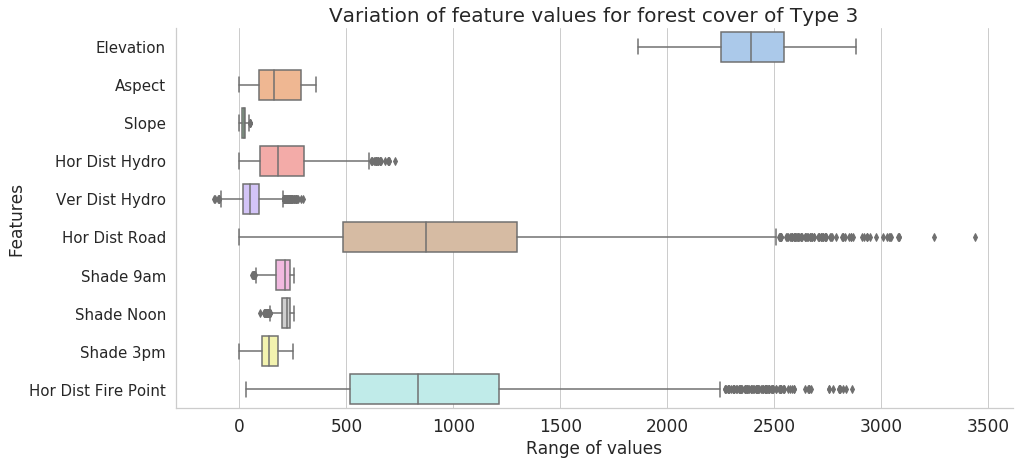

In [26]:
#plt = matplotlib.pyplot

# plot bg
sns.set_style("whitegrid")

#Size of the plot
plt.subplots(figsize=(15, 7))

# setting color of the plot
color = sns.color_palette('pastel')

# Using seaborn to plot it horizontally with 'color'
sns.boxplot(data = df_numeric, orient='h', palette=color)

# Title of the graph
plt.title('Variation of feature values for forest cover of Type 3', size = 20)

# Horizontal axis Label
plt.xlabel('Range of values', size = 17)
# Vertical axis Label
plt.ylabel('Features', size = 17)

# x-axis label size
plt.xticks(size = 17)
#y-axis label size
plt.yticks(size = 15)

# removing the top and right axes spines, which are not needed
sns.despine()
plt.show()

Every numerical feature is important and contributes to the prediction model as it is evident from the feature visualization that all the features have a wide amount of spread on the axis. Features like slope, shade noon, shade 9am and shade 3pm have a very short spread and hence have a low variance. From this we can infer that these features single handedly cannot contribute much for the classification problem but in combination with other features they can work well to discriminate between the target classes.

The features like Horizontal distance to Fire Point, Horizontal distance to road, Horizontal and Vertical distance to hydrology have outliers within them. The presence of outliers can result in two effects i.e Masking and Swamping effect. Hence each feature has to be engineered separately and then deployed into the model for classification. There are many proven techniques for handling outliers such as:
Deleting the observation  - But it is not advisable in our case as they represent some useful information, Binning, Imputing, Treating outliers separately with a statistical model are other strategies which can be adopted. 

**Correlation among the numerical features**

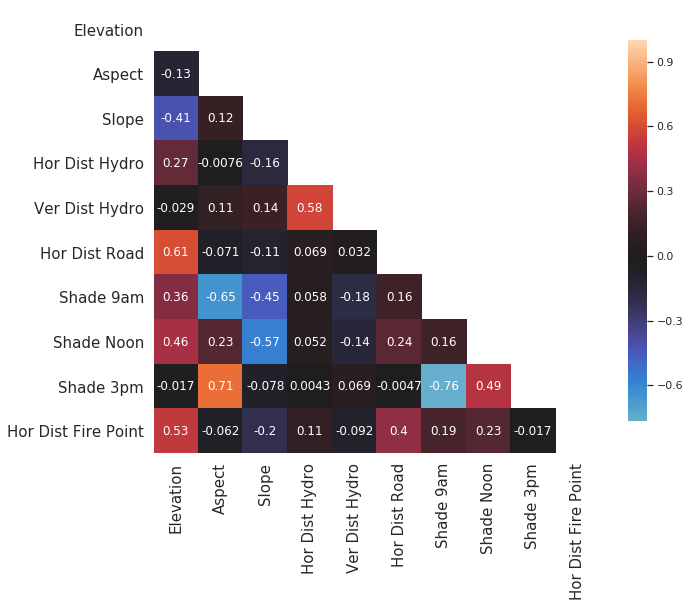

,Elevation,Aspect,Slope,Hor Dist Hydro,Ver Dist Hydro,Hor Dist Road,Shade 9am,Shade Noon,Shade 3pm,Hor Dist Fire Point
Elevation,1.000000,-0.129409,-0.414700,0.270129,-0.029135,0.612044,0.359968,0.460831,-0.016526,0.529622
Aspect,-0.129409,1.000000,0.118810,-0.007557,0.113279,-0.070565,-0.646697,0.228637,0.711328,-0.062092
Slope,-0.414700,0.118810,1.000000,-0.158270,0.135935,-0.112896,-0.454196,-0.574876,-0.078108,-0.204759
Hor Dist Hydro,0.270129,-0.007557,-0.158270,1.000000,0.582756,0.069350,0.057582,0.052091,0.004252,0.110912
Ver Dist Hydro,-0.029135,0.113279,0.135935,0.582756,1.000000,0.032177,-0.182511,-0.144276,0.069184,-0.092445
Hor Dist Road,0.612044,-0.070565,-0.112896,0.069350,0.032177,1.000000,0.159978,0.243789,-0.004695,0.399479
Shade 9am,0.359968,-0.646697,-0.454196,0.057582,-0.182511,0.159978,1.000000,0.164542,-0.763341,0.192419
Shade Noon,0.460831,0.228637,-0.574876,0.052091,-0.144276,0.243789,0.164542,1.000000,0.491672,0.232848
Shade 3pm,-0.016526,0.711328,-0.078108,0.004252,0.069184,-0.004695,-0.763341,0.491672,1.000000,-0.016908
Hor Dist Fire Point,0.529622,-0.062092,-0.204759,0.110912,-0.092445,0.399479,0.192419,0.232848,-0.016908,1.000000


In [27]:
plt.subplots(figsize=(10, 10))

# Compute the correlation matrix
df_numeric_corr = df_numeric.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(df_numeric_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Generates heatmap masking the upper triangle and shrinking the cbar
ax = sns.heatmap(df_numeric_corr, mask=mask, center=0, square=True, annot=True, annot_kws={"size": 12}, cbar_kws={"shrink": .7})

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)


# x-axis label size
plt.xticks(size = 15)
# y-axis label size
plt.yticks(size = 15)

# display plot
plt.show()
print("\n")
df_numeric_corr

**Extracting highly and negatively correlated features**

In [0]:
cols = df_numeric_corr.columns
threshold = 0.5
highly_corr_list = []
for i in range(0, 9):
    for j in range(i+1, 9):
        if df_numeric_corr.iloc[i,j] >= threshold and df_numeric_corr.iloc[i,j]<1\
        or df_numeric_corr.iloc[i,j] <0 and df_numeric_corr.iloc[i,j]<=-threshold:
            highly_corr_list.append([df_numeric_corr.iloc[i,j],i,j])

In [29]:
 print("**The most correlated features among the numeric category with threshold of 0.5 for positive and -0.5 for negative correlation are**")
 for v,i,j in highly_corr_list:
    print("%s and %s = %.2f" % (cols[i], cols[j], v))

**The most correlated features among the numeric category with threshold of 0.5 for positive and -0.5 for negative correlation are**
Elevation and Hor Dist Road = 0.61
Aspect and Shade 9am = -0.65
Aspect and Shade 3pm = 0.71
Slope and Shade Noon = -0.57
Hor Dist Hydro and Ver Dist Hydro = 0.58
Shade 9am and Shade 3pm = -0.76


Having highly correlated features (both positive and negative) is a type of redundancy in features they do not convey extra information. This means the regression coefficients are not uniquely determined. In turn it affects the interpretability of the model as then the regression coefficients are not unique and have influences from other features. Where as less correlated value tell us that the features have different valueable information to tell us and model, hence important features for predictions.

**Solution:**

> * Reduce the number of features through a feature extraction technique (e.g., via principal components)
> * Greedy Elimination and Recursive Feature Elimination to iteratively elimnate features with respect to their correlation to other features and their importance.
 

**Function for counting the occurences of each of the wilderness area for the cover type 3**

In [0]:
def count_of_occurences(Wild_Area):
    count = 0
    for i in range(len(Wild_Area)):
        if Wild_Area[i] == 1:
            count = count + 1
    return count

In [0]:
count_area1 = count_of_occurences(Wild_Area1)
count_area2 = count_of_occurences(Wild_Area2)
count_area3 = count_of_occurences(Wild_Area3)
count_area4 = count_of_occurences(Wild_Area4)

**Plotting of Pie chart to visualize the dominant wilderness area for cover type 3**

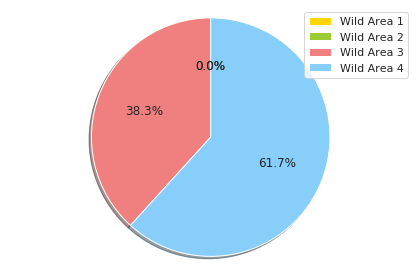

In [32]:
labels = 'Wild Area 1', 'Wild Area 2', 'Wild Area 3', 'Wild Area 4'
sizes = [count_area1, count_area2, count_area3, count_area4]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
patches, texts, percent = plt.pie(sizes, colors=colors, shadow=True, startangle=90, autopct='%1.1f%%')
plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.show()

From the graph it is clear that the wilderness area 1 and 2 does not contribute for predicting the cover type 3. Hence it would be adivisable to use  weights for each area which adapts itself such that it weighs the area with dominant occurrence the highest and then slashes the weights for the other area in descending order.

**Collecting the occurences of each soil type with respect to cover type 3**

In [33]:
count = []
for i in range(40):
    soil_type_entries = [row[i] for row in Soil_type]
    count.append(sum(soil_type_entries))

j = 0
for i in range(len(count)):
    j=j+1
    print("The number of observations in Soil Type {} = {}".format(j, count[i]))

The number of observations in Soil Type 1 = 213.0
The number of observations in Soil Type 2 = 494.0
The number of observations in Soil Type 3 = 226.0
The number of observations in Soil Type 4 = 703.0
The number of observations in Soil Type 5 = 118.0
The number of observations in Soil Type 6 = 387.0
The number of observations in Soil Type 7 = 0.0
The number of observations in Soil Type 8 = 0.0
The number of observations in Soil Type 9 = 0.0
The number of observations in Soil Type 10 = 1155.0
The number of observations in Soil Type 11 = 158.0
The number of observations in Soil Type 12 = 0.0
The number of observations in Soil Type 13 = 2.0
The number of observations in Soil Type 14 = 12.0
The number of observations in Soil Type 15 = 0.0
The number of observations in Soil Type 16 = 14.0
The number of observations in Soil Type 17 = 46.0
The number of observations in Soil Type 18 = 0.0
The number of observations in Soil Type 19 = 0.0
The number of observations in Soil Type 20 = 0.0
The numbe

**Plotting of Bar Graph to visualize the significant soil type that contribute to the prediction of cover type 3**

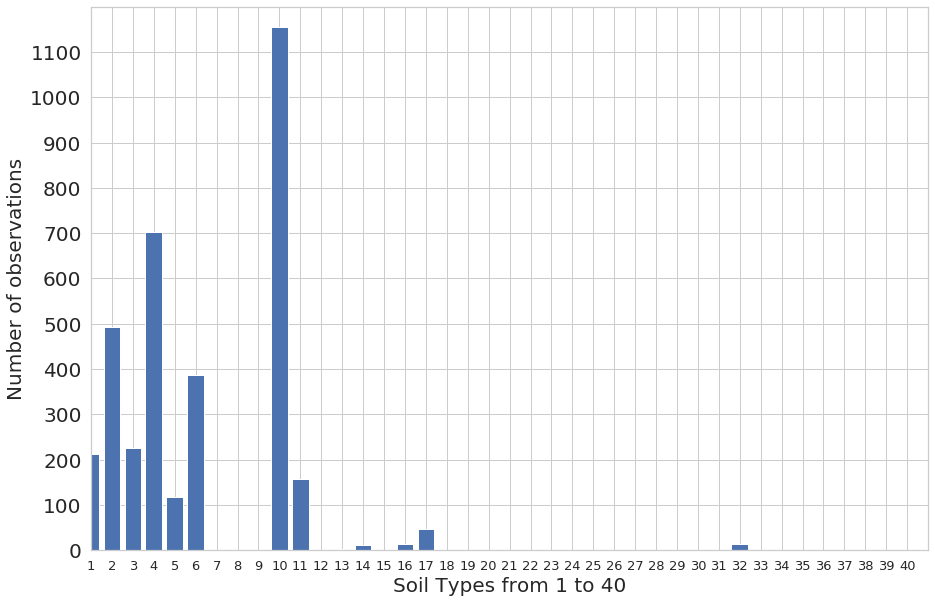

In [34]:
plt.figure(figsize=(15,10))
plt.bar(range(1, 41), count)
#rcParams['figure.figsize'] = 5, 10

plt.xlim([1, 41])
plt.ylim([0, 1200])
plt.yticks(np.arange(0, 1200, 100), size=20)
plt.xticks(np.arange(1, 41, 1), size = 13)
plt.xlabel('Soil Types from 1 to 40', fontsize=20)
plt.ylabel('Number of observations', fontsize=20)
plt.show()

There are 40 soil types which is really useful to perform feature extraction. From the graph we can come to a conclusion that there are only handful of soil type which are critical in predicting the desired cover type. 
The optimal way to handle this category of features will be to drop out all the soil types that have no or zero occurrences for the cover type 3.
Then use weighing technique for each soil type because simply assigning weights to all the soil types without dropping the least significant ones will not be logical as it will sum up to zero anyways.

# **Rough Work - Not for evaluation**

In [67]:
X = df_numeric  #independent columns
y = df_target_covertype_true    #target column i.e price range
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score')) 

ValueError: ignored

In [66]:
df_target_covertype_true

,Target
0,1
1,1
2,1
3,1
4,1
...,...
3536,1
3537,1
3538,1
3539,1


In [0]:
print("Original data length={}".format(len(dataset.data)))
print("Sample data length={}".format(len(random_sample.data)))

Original data length=581012
Sample data length=58101


In [0]:
print("shape of original data = {}".format(dataset.data.shape))
print("shape of sample data = {}".format(random_sample.shape))
print("shape of features = {}".format(features.shape))
print("shape of target = {}".format(target.shape))

shape of original data = (581012, 54)
shape of sample data = (58101,)
shape of features = (58101, 54)
shape of target = (58101,)


In [0]:
target = target.astype(int)

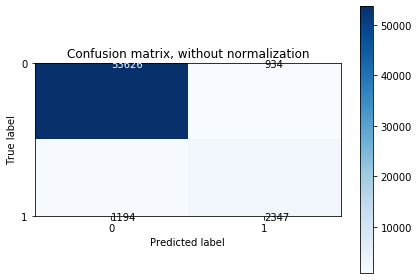

In [0]:
def plot_confusion_matrix(cf, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
   
    #cm = confusion_matrix(y_true, y_pred)
    plt.imshow(cf, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    thresh = cf.max() / 2.
    for i, j in itertools.product(range(cf.shape[0]), range(cf.shape[1])):
        plt.text(j, i, format(cf[i, j], 'd'),
                  ha="left", va="center_baseline",
                 color="white" if cf[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cf, classes=[0, 1],
                      title='Confusion matrix, without normalization')
#'top', 'bottom', 'center', 'baseline', 'center_baseline'
#'center', 'right', 'left'

In [0]:
print(sklearn.metrics.classification_report(target, training_predictions))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     54560
           1       0.72      0.66      0.69      3541

    accuracy                           0.96     58101
   macro avg       0.85      0.82      0.83     58101
weighted avg       0.96      0.96      0.96     58101



In [0]:
def metrics_score_check(class_name):
    #print("The {} averaging metric values are as follows".format(avg_tech))   
    print("The precison score for class {} = {:0.4f}".format(class_name, precision_score(target, training_predictions, pos_label=class_name, average=avg_tech)))
    print("The recall score for class {} = {:0.4f}".format(class_name, recall_score(target, training_predictions, pos_label=class_name, average=avg_tech)))
    print("The F1 score for class {} = {:0.4f}".format(class_name, f1_score(target, training_predictions, pos_label=class_name, average=avg_tech)))

[]

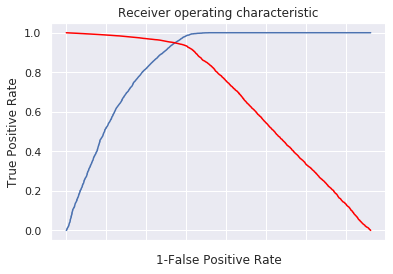

In [0]:
import pandas as pd

i = np.arange(len(tpr)) # index for df
roc = pd.DataFrame({'fpr' : pd.Series(fpr, index=i),'tpr' : pd.Series(tpr, index = i), '1-fpr' : pd.Series(1-fpr, index = i), 'tf' : pd.Series(tpr - (1-fpr), index = i), 'thresholds' : pd.Series(threshold, index = i)})
roc.ix[(roc.tf-0).abs().argsort()[:1]]

# Plot tpr vs 1-fpr
fig, ax = plt.subplots()
plt.plot(roc['tpr'])
plt.plot(roc['1-fpr'], color = 'red')
plt.xlabel('1-False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
ax.set_xticklabels([])

In [0]:
#specific_features = []
#numeric_specific_features = []
#binary_specific_features_soil_types = []
#binary_specific_features_Wilderness_Area = []

#for i in range(len(target_covertype)):
    #if target_covertype[i] == 1:
       #specific_features.append(features[i])

#for i in range(len(specific_features)):
    #numeric_specific_features.append(specific_features[i][0:10])

#for i in range(len(specific_features)):
    #binary_specific_features_Wilderness_Area.append(specific_features[i][10:14])

#for i in range(len(specific_features)):
    #.append(specific_features[i][14:])


The number of observations in Soil Type 1 = 213.0
The number of observations in Soil Type 2 = 494.0
The number of observations in Soil Type 3 = 226.0
The number of observations in Soil Type 4 = 703.0
The number of observations in Soil Type 5 = 118.0
The number of observations in Soil Type 6 = 387.0
The number of observations in Soil Type 7 = 0.0
The number of observations in Soil Type 8 = 0.0
The number of observations in Soil Type 9 = 0.0
The number of observations in Soil Type 10 = 1155.0
The number of observations in Soil Type 11 = 158.0
The number of observations in Soil Type 12 = 0.0
The number of observations in Soil Type 13 = 2.0
The number of observations in Soil Type 14 = 12.0
The number of observations in Soil Type 15 = 0.0
The number of observations in Soil Type 16 = 14.0
The number of observations in Soil Type 17 = 46.0
The number of observations in Soil Type 18 = 0.0
The number of observations in Soil Type 19 = 0.0
The number of observations in Soil Type 20 = 0.0
The numbe

In [0]:
for x in range(1,10):
        d["string{0}".format(x)]="Hello"